## WEEK 7 SOLUTIONS

## PART 1

(-0.190796865689173, -0.9626100878265496)

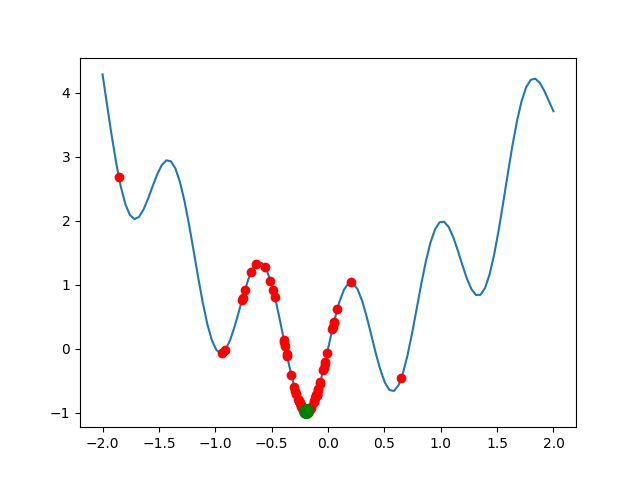

In [11]:
# Set up imports
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
frame = 1000
def func(x):
    return x**2 + np.sin(8*x)

xbase = np.linspace(-2, 2, 100)
ybase = func(xbase)

    
def sa(func, sp, temp, decayrate):
    T = temp
    decayrate = decayrate
    # Set up some large value for the best cost found so far
    bestcost = 100000
    # Generate several values within a search 'space' and check whether the new value is better
    # than the best seen so far.
    bestx = sp
    rangemin, rangemax = -2, 2 
    fig, ax = plt.subplots()
    ax.plot(xbase, ybase)
    xall, yall = [], []
    lnall,  = ax.plot([], [], 'ro')
    lngood, = ax.plot([], [], 'go', markersize=10)
    for i in range(frame):
        #global bestcost, bestx, decayrate, T
        # Generate a random value \in -2, +2
        dx = (np.random.random_sample() - 0.5) * T
        x = bestx + dx
        # print(f"Old x = {x}, delta = {dx}")
        y = func(x)
        if y < bestcost:
            # print(f"Improved from {bestcost} at {bestx} to {y} at {x}")
            bestcost = y
            bestx = x
            lngood.set_data(x, y)
        else:
            toss = np.random.random_sample() #Gives random number bw 0 and 1
            if toss < np.exp(-(y-bestcost)/T):
                bestcost = y
                bestx = x
                lngood.set_data(x, y)
            # print(f"New cost {y} worse than best so far: {bestcost}")
            pass
        T = T * decayrate
        xall.append(x)
        yall.append(y)
        lnall.set_data(xall, yall)
    return bestx, y
sa(func, -2, 3, 0.95)

### PART 1 Explanation
- Instead of gradient descent we use Simulated Annealing to find the global minima. 
- This technique is used to search a larger sample space. It allows us to find minimas which aren't close to the starting point.
- Initially since the temperature function is high, the probability to move to other values which might be worse wrt minima is higher.
- As we iterate many times, the temperature decreases by a factor called the decay rate, hence the probability function also decreases. 
- As the probability decreases our search gets more localised.
- Note that bestx still has significant impact on the output here too. 
- In the above code I have just put the code given in the presentation in a function sa.

## PART 2

In [2]:
# Set up imports
%matplotlib ipympl
import numpy as np
import random
import matplotlib.pyplot as plt
import math
from matplotlib.animation import FuncAnimation
#reading the file
def read(name):
    file = open(name,"r")
    file_data = file.readlines()  #read file data into a list of lines
    file.close()
    return file_data
file_data = read("tsp_100.txt")
data_length = int(file_data[0].split()[0])
data = []
for i in range(1,data_length + 1):
    line = file_data[i].split()
    data.append([float(line[0]),float(line[1])])
#length bw 2 points
def length(p1,p2):
    return ((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)**0.5
#calculates the total distance travelled in the input dataset
def route(data):
    distance = 0
    for i in range(len(data)):
        city1 = data[i]
        city2 = None
        if i+1 < len(data):
            city2 = data[i+1]
        else:
            city2 = data[0] #going back to initial point
        distance += length(city1, city2)
    return distance

#swapping elements in dataset to find a better solution
def swap(data):
    data_copy = data.copy()# to prevent initial dataset from changing
    posone = random.choice(range(len(data)))
    postwo = random.choice(range(len(data)))
    data_copy[posone], data_copy[postwo] = data_copy[postwo], data_copy[posone]    
    return data_copy
      
def annealing(data):
    temp = 3
    decay = 0.95
    solution = data
    for i in range(10000):
        datanew = swap(solution)
        # Check if swap is best so far
        cost_diff = route(datanew) - route(solution)
        # if the new solution is better, accept it
        if cost_diff <  0:
            solution = datanew
        else:#if new solution is worse
            toss = np.random.random_sample()
            #accept it with the below probability
            if toss < np.exp(-(cost_diff)/float(temp)):
                solution = datanew
            pass
        # reduce the temp
        temp = temp*decay        
    #print("Shortest distance is :" ,route(solution))  
    return solution, route(solution)
solution, routelength = annealing(data)  
best_route_distance = []
best_route = []
#repeat it multiple times to get minima of minimas
for i in range(100):     
    r, rd = annealing(data)
    best_route_distance.append(rd)
    best_route.append(r)
print("Minimum distance travelled is :",min(best_route_distance))  

Minimum distance travelled is : 127.80984903385085


### OUTPUT LIST ORDER

In [16]:
output = []
for i in solution:
    output.append(data.index(i))
print("Order in which salesman should travel:" )
print(output)

Order in which salesman should travel:
[44, 81, 1, 70, 17, 16, 65, 19, 30, 88, 35, 23, 67, 5, 34, 61, 60, 94, 41, 90, 71, 21, 3, 22, 36, 80, 99, 18, 6, 76, 27, 7, 0, 24, 74, 40, 96, 73, 59, 29, 11, 37, 32, 33, 82, 51, 56, 45, 57, 38, 52, 93, 14, 54, 53, 97, 31, 55, 39, 42, 12, 84, 72, 87, 47, 68, 49, 48, 13, 8, 77, 91, 28, 64, 4, 89, 2, 26, 78, 43, 9, 66, 20, 83, 69, 85, 10, 62, 46, 58, 75, 63, 95, 50, 15, 25, 86, 92, 98, 79]


## OUTPUT PLOT

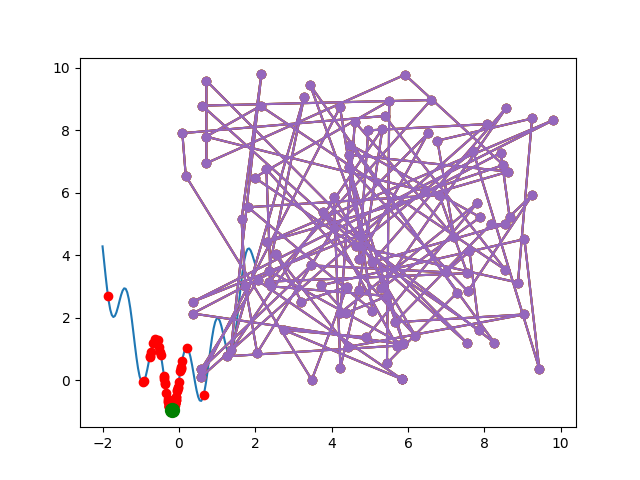

In [17]:
# Example Python input and plot
x_cities = np.array([x[0] for x in solution])
y_cities = np.array([y[1] for y in solution])
finalorder = output

# Rearrange for plotting
xplot = x_cities[finalorder] 
yplot = y_cities[finalorder]
xplot = np.append(xplot, xplot[0])
yplot = np.append(yplot, yplot[0])
plt.plot(xplot, yplot, 'o-')
plt.show()

## PART 2 EXPLANATION:
1. We define the requisite functions such as length between 2 points and read function to read the file.
2. We define a route function which calculates the total distance the salesman has to travel for the given dataset and in that order.
3. We define a swap function that swaps any two cities randomly. Random.choice picks a random number in that range.
4. We then define our state variables such as temperature and decay rate.
5. We define the initial solution to be the dataset in the file given.
6. We now start the annealing process. In each iteration of the process the below steps are followed.
7. We fist swap 2 nodes in the dataset.
8. We find the new route length and compare it with the previous route length.
9. If the new length is shorter, we take that as the new dataset for the next iteration.
10. If it it is longer we accept that as the new solution if the  probability for that temperature and costdiff is greater than some random number between 0 and 1.
11. We then reduce the temp by decay factor.
12. We repeat this process multiple times to get the optimal solution.

